# Cyclistic Bike-Share Analysis  
## Key Visualizations

This notebook presents selected visualizations that support the business insights and recommendations from the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")

In [2]:
# Load raw data
DATA_PATH = Path("../data/raw")
files = sorted(DATA_PATH.glob("*.csv"))

df = pd.concat(
    [pd.read_csv(file) for file in files],
    ignore_index=True
)

# Convert datetime columns
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")
df["ended_at"] = pd.to_datetime(df["ended_at"], errors="coerce")

# Ride duration
df["ride_duration_minutes"] = (
    (df["ended_at"] - df["started_at"])
    .dt.total_seconds() / 60
)

# Clean data (same rules as Day 2)
df_clean = df[
    (df["ride_duration_minutes"] > 0) &
    (df["ride_duration_minutes"] <= 1440)
].copy()

# Time features
df_clean["ride_month"] = df_clean["started_at"].dt.month
df_clean["ride_day_of_week"] = df_clean["started_at"].dt.day_name()
df_clean["ride_hour"] = df_clean["started_at"].dt.hour
df_clean["is_weekend"] = df_clean["ride_day_of_week"].isin(["Saturday", "Sunday"])

df_clean.shape

(5547380, 18)

In [3]:
monthly_volume = (
    df_clean
    .groupby(["member_casual", "ride_month"])
    .size()
    .reset_index(name="ride_count")
)

monthly_volume.head()

,member_casual,ride_month,ride_count
0,casual,1,24076
1,casual,2,27709
2,casual,3,85662
3,casual,4,108971
4,casual,5,182263


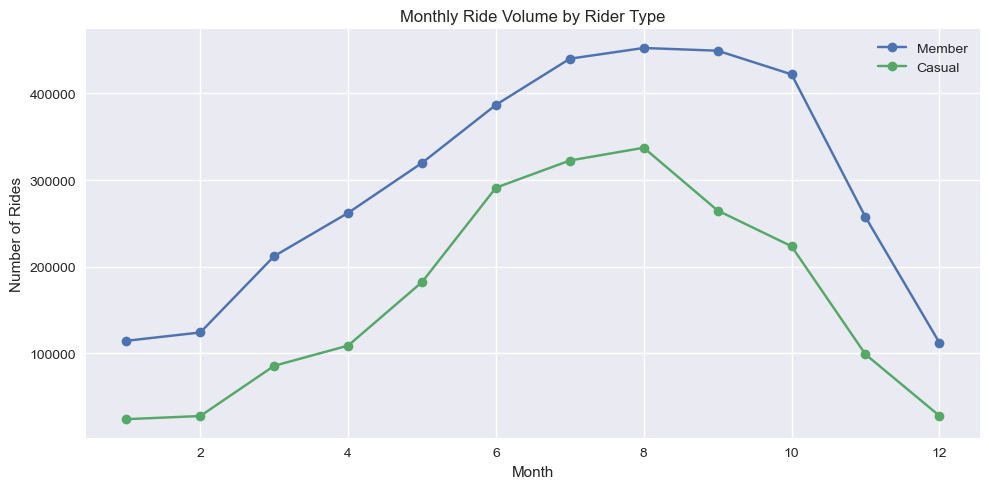

In [4]:
plt.figure(figsize=(10, 5))

for rider_type in ["member", "casual"]:
    subset = monthly_volume[monthly_volume["member_casual"] == rider_type]
    plt.plot(
        subset["ride_month"],
        subset["ride_count"],
        marker="o",
        label=rider_type.capitalize()
    )

plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Ride Volume by Rider Type")
plt.legend()
plt.tight_layout()
plt.show()

### Insight

- Ride volume increases during warmer months for both rider types.
- Casual riders show a sharper seasonal spike compared to members.
- This highlights peak-season opportunities to convert frequent casual riders
  into annual members.

In [5]:
weekday_weekend_volume = (
    df_clean
    .groupby(["member_casual", "is_weekend"])
    .size()
    .reset_index(name="ride_count")
)

weekday_weekend_volume

,member_casual,is_weekend,ride_count
0,casual,False,1250781
1,casual,True,744030
2,member,False,2720338
3,member,True,832231


In [6]:
duration_summary = (
    df_clean
    .groupby("member_casual")["ride_duration_minutes"]
    .median()
    .reset_index()
)

duration_summary

,member_casual,ride_duration_minutes
0,casual,11.377383
1,member,8.575667


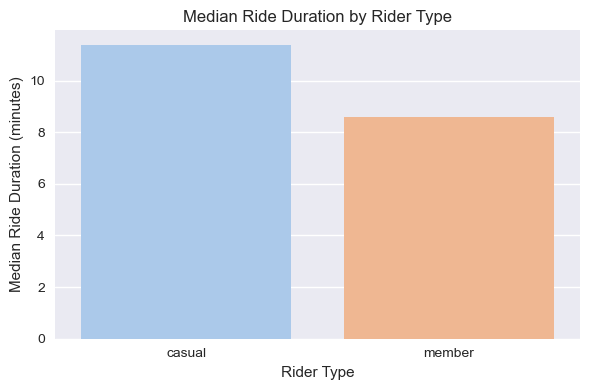

In [8]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=duration_summary,
    x="member_casual",
    y="ride_duration_minutes",
    hue="member_casual",
    palette="pastel",
    legend=False
)

plt.xlabel("Rider Type")
plt.ylabel("Median Ride Duration (minutes)")
plt.title("Median Ride Duration by Rider Type")
plt.tight_layout()
plt.show()

## Ride Duration Comparison

- Casual riders have a noticeably higher median ride duration than annual members.
- This suggests leisure-oriented usage among casual riders, compared to shorter, routine trips by members.
- Membership offerings and messaging can be positioned around convenience and cost-effectiveness for frequent shorter rides.